**Data Visualization with Map Format seeing changes over the years**

We use the `geom_polygon` and `facet_wrap` command in `ggplot2` to visualize the population changes over the years in the USA for further analysis

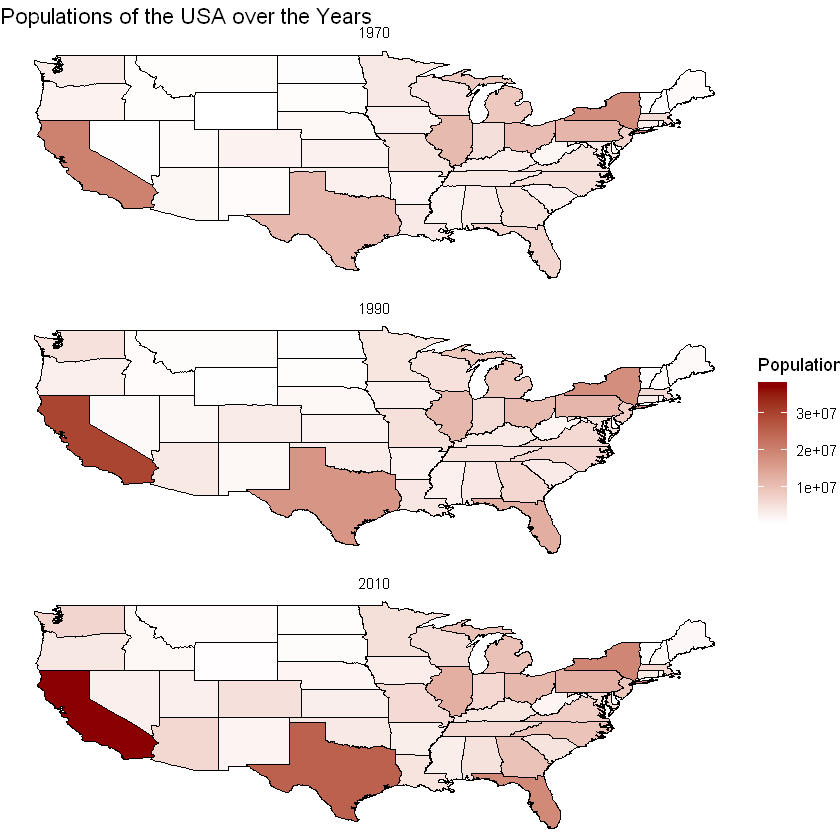

In [10]:
library(ggplot2)
library(dplyr)
library(maps)
d=read.csv("population.csv")
d$state=tolower(d$state)
e=d%>%filter(Year==1970|Year==1990|Year==2010)
usa_state=map_data("state")
#left join our data to embedded USA States data
all_data=left_join(usa_state,e,by=c("region"="state"))%>%filter(!is.na(Year))
#Plot the data using the facet_wrap
ggplot(all_data,aes(x=long,y=lat,group=group,fill=Population))+geom_polygon(color='black')+
  facet_wrap(~ Year,ncol=1)+
  scale_fill_gradient(low = "white", high = "darkred")+
  theme_void()+ggtitle("Populations of the USA over the Years")